# Royal Enfield Data process




In [ ]:
# Importing required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from scipy import stats
%matplotlib inline
from textblob import TextBlob
import seaborn as sns


In [ ]:
royalEnfieeld_df = pd.read_csv("Old_RoyalEnfield.csv",sep='\t')
royalEnfieeld_df.head()

,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,Extra Features,Likes,Dislikes,Used it for,Owned for,Mileage,Ridden for
0,Tarun Kumar,1 day ago by,5,Best ever review of bullet,5.0,5.0,5.0,4.0,4.0,5.0,4.0,0,0,Daily Commute,> 1 yr,28 kmpl,< 5000 kms
1,Mohammed Mujeeb,2 weeks ago by,5,Pleasure to suggest you are classic,5.0,5.0,5.0,NaN,NaN,5.0,NaN,3,5,Daily Commute,> 1 yr,30 kmpl,> 15000 kms
2,Shubham Sadhuka,3 weeks ago by,4,A timeless legend!,5.0,5.0,5.0,4.0,4.0,5.0,4.0,6,9,Everything,6 months-1 yr,42 kmpl,5000-10000 kms
3,Naman Mahajan,1 month ago by,5,Nice review,5.0,5.0,5.0,NaN,NaN,5.0,NaN,5,9,Everything,> 1 yr,33 kmpl,> 15000 kms
4,Vishal Upadhyay,1 month ago by,5,Dream bike,5.0,5.0,5.0,NaN,NaN,5.0,NaN,3,1,Daily Commute,> 1 yr,38 kmpl,> 15000 kms


# Performing Statistical analysis

In [ ]:
# Calculating mean for the data
royalEnfieeld_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Rating                 4.368491
Visual Appeal          4.996672
Reliability            4.993834
Performance            4.992908
Comfort                3.996881
Service Experience     3.995529
Maintenance cost       5.000000
Extra Features         4.000000
Likes                 27.825100
Dislikes               5.180908
dtype: float64

In [ ]:
#Checking whether data has null values or not.
royalEnfieeld_df.isna().sum()

Name                    0
Year                    0
Rating                  0
Description             0
Visual Appeal         296
Reliability           525
Performance           793
Comfort               536
Service Experience    827
Maintenance cost      795
Extra Features        537
Likes                   0
Dislikes                0
Used it for           211
Owned for             211
Mileage               819
Ridden for            287
dtype: int64

## Data Cleaning 

Cleaning the data beacuse there are some null values and the format of date is not useful for visualization process.

Replacing Missing values with 0

In [ ]:
royalEnfieeld_df.fillna(0,inplace=True)

Printing first 5 rows

In [ ]:
royalEnfieeld_df.head()

,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,Extra Features,Likes,Dislikes,Used it for,Owned for,Mileage,Ridden for
0,Tarun Kumar,1 day ago by,5,Best ever review of bullet,5.0,5.0,5.0,4.0,4.0,5.0,4.0,0,0,Daily Commute,> 1 yr,28 kmpl,< 5000 kms
1,Mohammed Mujeeb,2 weeks ago by,5,Pleasure to suggest you are classic,5.0,5.0,5.0,0.0,0.0,5.0,0.0,3,5,Daily Commute,> 1 yr,30 kmpl,> 15000 kms
2,Shubham Sadhuka,3 weeks ago by,4,A timeless legend!,5.0,5.0,5.0,4.0,4.0,5.0,4.0,6,9,Everything,6 months-1 yr,42 kmpl,5000-10000 kms
3,Naman Mahajan,1 month ago by,5,Nice review,5.0,5.0,5.0,0.0,0.0,5.0,0.0,5,9,Everything,> 1 yr,33 kmpl,> 15000 kms
4,Vishal Upadhyay,1 month ago by,5,Dream bike,5.0,5.0,5.0,0.0,0.0,5.0,0.0,3,1,Daily Commute,> 1 yr,38 kmpl,> 15000 kms


In [ ]:
royalEnfieeld_df.isna().sum()

Name                  0
Year                  0
Rating                0
Description           0
Visual Appeal         0
Reliability           0
Performance           0
Comfort               0
Service Experience    0
Maintenance cost      0
Extra Features        0
Likes                 0
Dislikes              0
Used it for           0
Owned for             0
Mileage               0
Ridden for            0
dtype: int64

In [ ]:
str_da = (royalEnfieeld_df['Year'])
print(str_da)


0         1 day ago by
1       2 weeks ago by
2       3 weeks ago by
3       1 month ago by
4       1 month ago by
             ...      
1493    4 years ago by
1494    4 years ago by
1495    4 years ago by
1496    4 years ago by
1497    5 years ago by
Name: Year, Length: 1498, dtype: object


Whenever the code runs the date come according to current date. So if user runs the code the years will get change which results into different visualizations. 

In [ ]:
import re
from datetime import datetime, timedelta
RE_df = pd.DataFrame(columns=['Col-1'])
key = ['Col-1']
val=[]
def string_to_delta(s):
  # print(s)
  value = int(re.search(r'\d+', s).group())
  if "day" in s:
      value = value*1
  elif "month" in s:
      value = value *30 
  elif "years" in s:
      value = value *365 
  date_ago = (datetime.now() - timedelta(days=value)).date() 
  str_date= date_ago.strftime("%d %B %Y")
  val.append(str_date)
  
for s1 in str_da:
  string_to_delta(s1)
v = [[val]]
for i,j in zip(key,v):
  RE_df[i] = j

print(RE_df['Col-1'])

0    [02 May 2022, 01 May 2022, 30 April 2022, 03 A...
Name: Col-1, dtype: object


In [ ]:
royalEnfieeld_df['Year']= RE_df['Col-1'][0]

In [ ]:
royalEnfieeld_df.head()


,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,Extra Features,Likes,Dislikes,Used it for,Owned for,Mileage,Ridden for
0,Tarun Kumar,02 May 2022,5,Best ever review of bullet,5.0,5.0,5.0,4.0,4.0,5.0,4.0,0,0,Daily Commute,> 1 yr,28 kmpl,< 5000 kms
1,Mohammed Mujeeb,01 May 2022,5,Pleasure to suggest you are classic,5.0,5.0,5.0,0.0,0.0,5.0,0.0,3,5,Daily Commute,> 1 yr,30 kmpl,> 15000 kms
2,Shubham Sadhuka,30 April 2022,4,A timeless legend!,5.0,5.0,5.0,4.0,4.0,5.0,4.0,6,9,Everything,6 months-1 yr,42 kmpl,5000-10000 kms
3,Naman Mahajan,03 April 2022,5,Nice review,5.0,5.0,5.0,0.0,0.0,5.0,0.0,5,9,Everything,> 1 yr,33 kmpl,> 15000 kms
4,Vishal Upadhyay,03 April 2022,5,Dream bike,5.0,5.0,5.0,0.0,0.0,5.0,0.0,3,1,Daily Commute,> 1 yr,38 kmpl,> 15000 kms


# Sentimental Analysis

In [ ]:
polarity = []
subjectivity = []
for i in royalEnfieeld_df['Description'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)

  except:
    polarity.append(0)
    subjectivity.append(0)
    royalEnfieeld_df['polarity'] = polarity
    royalEnfieeld_df['subjectivity'] = subjectivity

In [ ]:
royalEnfieeld_df['polarity']=polarity
royalEnfieeld_df['subjectivity']=subjectivity

In [ ]:
royalEnfieeld_df['Final Result'] = None
royalEnfieeld_df['Positive Reviews'] = None
royalEnfieeld_df['Negative Reviews'] = None
royalEnfieeld_df['Neutral Reviews'] = None
for i in range(0,len(royalEnfieeld_df)):
    final=TextBlob(royalEnfieeld_df['Description'][i])
    if final.sentiment.polarity > 0:
        royalEnfieeld_df['Final Result'][i]='Positive'
        royalEnfieeld_df['Positive Reviews'][i] = 1
        royalEnfieeld_df['Negative Reviews'][i] = 0
        royalEnfieeld_df['Neutral Reviews'][i] = 0
    elif final.sentiment.polarity < 0:
        royalEnfieeld_df['Final Result'][i]='Negative'
        royalEnfieeld_df['Positive Reviews'][i] = 0
        royalEnfieeld_df['Negative Reviews'][i] = 1
        royalEnfieeld_df['Neutral Reviews'][i] = 0
    else:
        royalEnfieeld_df['Final Result'][i]='Neutral'
        royalEnfieeld_df['Positive Reviews'][i] = 0
        royalEnfieeld_df['Negative Reviews'][i] = 0
        royalEnfieeld_df['Neutral Reviews'][i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [ ]:
royalEnfieeld_df.head()

,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,...,Used it for,Owned for,Mileage,Ridden for,polarity,subjectivity,Final Result,Positive Reviews,Negative Reviews,Neutral Reviews
0,Tarun Kumar,02 May 2022,5,Best ever review of bullet,5.0,5.0,5.0,4.0,4.0,5.0,...,Daily Commute,> 1 yr,28 kmpl,< 5000 kms,1.000000,0.300000,Positive,1,0,0
1,Mohammed Mujeeb,01 May 2022,5,Pleasure to suggest you are classic,5.0,5.0,5.0,0.0,0.0,5.0,...,Daily Commute,> 1 yr,30 kmpl,> 15000 kms,0.166667,0.166667,Positive,1,0,0
2,Shubham Sadhuka,30 April 2022,4,A timeless legend!,5.0,5.0,5.0,4.0,4.0,5.0,...,Everything,6 months-1 yr,42 kmpl,5000-10000 kms,0.000000,0.000000,Neutral,0,0,1
3,Naman Mahajan,03 April 2022,5,Nice review,5.0,5.0,5.0,0.0,0.0,5.0,...,Everything,> 1 yr,33 kmpl,> 15000 kms,0.600000,1.000000,Positive,1,0,0
4,Vishal Upadhyay,03 April 2022,5,Dream bike,5.0,5.0,5.0,0.0,0.0,5.0,...,Daily Commute,> 1 yr,38 kmpl,> 15000 kms,0.000000,0.000000,Neutral,0,0,1


In [ ]:
# Negative comments
royalEnfieeld_df[royalEnfieeld_df.polarity<0].head(5)

,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,...,Used it for,Owned for,Mileage,Ridden for,polarity,subjectivity,Final Result,Positive Reviews,Negative Reviews,Neutral Reviews
23,Rajkumar,04 November 2021,1,Very poor,0.0,0.0,0.0,4.0,4.0,0.0,...,Daily Commute,> 1 yr,30 kmpl,5000-10000 kms,-0.520,0.780,Negative,0,1,0
37,Vishwanath L,05 September 2021,4,Coming to the looks other bikes can be compar...,5.0,5.0,0.0,4.0,4.0,0.0,...,Everything,Never owned,0,37 kmpl,-0.125,0.375,Negative,0,1,0
51,Manivannan M,07 June 2021,1,Worst bike,0.0,0.0,0.0,0.0,0.0,0.0,...,Daily Commute,< 3 months,19 kmpl,< 5000 kms,-1.000,1.000,Negative,0,1,0
68,Manish,02 May 2022,1,Worst service and quality of the product.,5.0,0.0,0.0,4.0,0.0,0.0,...,Occasional Commute,6 months-1 yr,35 kmpl,5000-10000 kms,-1.000,1.000,Negative,0,1,0
88,Rajesh P,02 May 2022,1,Waste of money,0.0,0.0,0.0,0.0,0.0,0.0,...,Daily Commute,3-6 months,0,< 5000 kms,-0.200,0.000,Negative,0,1,0


In [ ]:
# Neutral comments
royalEnfieeld_df[royalEnfieeld_df.polarity==0].head()

,Name,Year,Rating,Description,Visual Appeal,Reliability,Performance,Comfort,Service Experience,Maintenance cost,...,Used it for,Owned for,Mileage,Ridden for,polarity,subjectivity,Final Result,Positive Reviews,Negative Reviews,Neutral Reviews
2,Shubham Sadhuka,30 April 2022,4,A timeless legend!,5.0,5.0,5.0,4.0,4.0,5.0,...,Everything,6 months-1 yr,42 kmpl,5000-10000 kms,0.0,0.0,Neutral,0,0,1
4,Vishal Upadhyay,03 April 2022,5,Dream bike,5.0,5.0,5.0,0.0,0.0,5.0,...,Daily Commute,> 1 yr,38 kmpl,> 15000 kms,0.0,0.0,Neutral,0,0,1
5,Rinku,03 April 2022,4,Indian hunk,5.0,0.0,0.0,4.0,4.0,0.0,...,Daily Commute,> 1 yr,35 kmpl,10000-15000 kms,0.0,0.0,Neutral,0,0,1
6,Manammal Swalih,04 March 2022,5,Improve the features,5.0,5.0,5.0,0.0,0.0,5.0,...,Everything,> 1 yr,40 kmpl,> 15000 kms,0.0,0.0,Neutral,0,0,1
10,Saroj Kumar Nayak,03 January 2022,1,10,5.0,5.0,5.0,0.0,0.0,5.0,...,Daily Commute,> 1 yr,55 kmpl,> 15000 kms,0.0,0.0,Neutral,0,0,1


Sentiment Analysis model 2

In [ ]:
OverallSentiAnalisis = TextBlob(royalEnfieeld_df['Description'].to_string()).sentiment

In [ ]:
print(OverallSentiAnalisis)

Sentiment(polarity=0.32349932908328916, subjectivity=0.5584024434298038)


# Visualizations

Bar graph between Rating and Year.

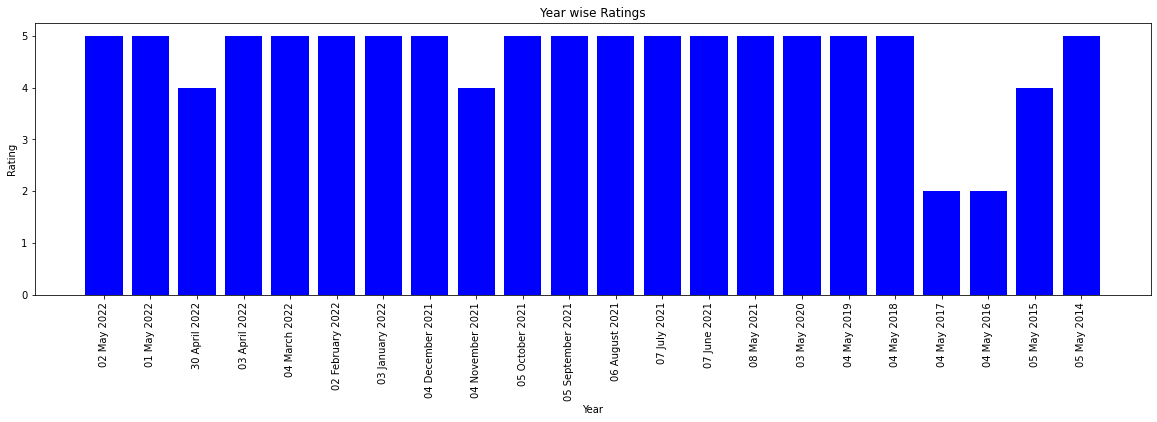

In [ ]:
plt.bar(royalEnfieeld_df['Year'], royalEnfieeld_df['Rating'], color='blue')
plt.title('Year wise Ratings')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)

In [ ]:
import plotly.express as plex
plex.scatter(x=royalEnfieeld_df['subjectivity'],y=royalEnfieeld_df['polarity'],color=royalEnfieeld_df['subjectivity'])


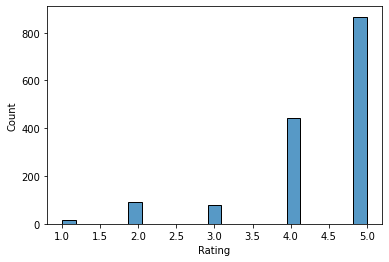

In [ ]:
# Plot
sns.histplot(data=royalEnfieeld_df,x='Rating')

# Classification

Machine learning algorithms for calculating accuracy.

KNN Algorithm

In [ ]:
X = royalEnfieeld_df[['Visual Appeal', 'Reliability',
       'Performance', 'Comfort', 'Service Experience', 'Maintenance cost',
       'Extra Features',]] .values 
X[0:5]

array([[5., 5., 5., 4., 4., 5., 4.],
       [5., 5., 5., 0., 0., 5., 0.],
       [5., 5., 5., 4., 4., 5., 4.],
       [5., 5., 5., 0., 0., 5., 0.],
       [5., 5., 5., 0., 0., 5., 0.]])

In [ ]:
Y = royalEnfieeld_df['Rating'].values
Y[0:5]

array([5, 5, 4, 5, 5])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1198, 7) (1198,)
Test set: (300, 7) (300,)


In [ ]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

In [ ]:
y_pred = neigh.predict(X_test)
y_pred[0:5]

array([5, 5, 5, 4, 5])

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.6433333333333333


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):   
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_pred)    
mean_acc

array([0.64333333, 0.67      , 0.72333333, 0.72333333, 0.72333333,
       0.72333333, 0.72333333, 0.71      , 0.72333333])

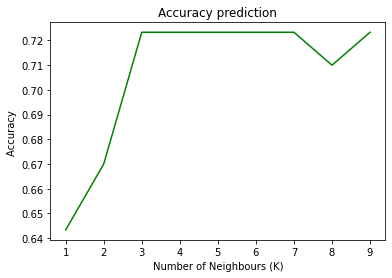

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.title("Accuracy prediction")
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

# Modellling - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
RE_LR = LogisticRegression().fit(X_train,Y_train)

RE_LR

Now we can predict data using our input test set:

In [ ]:
yhat_pred = RE_LR.predict(X_test)
yhat_pred

array([5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 2, 4, 5, 4, 5, 2, 5, 5, 5, 5,
       4, 5, 4, 4, 5, 2, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 2, 5, 5, 5,
       4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 4, 5, 2, 5, 5, 5, 5, 5, 4,
       4, 5, 2, 4, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 4, 2, 5, 2, 4, 4, 3,
       5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 2, 2, 5,
       2, 5, 5, 5, 5, 5, 4, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 2, 4, 2, 5, 5,
       4, 2, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 2,
       2, 5, 5, 5, 3, 5, 5, 5, 5, 4, 2, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 4, 2, 2, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 2, 5, 5,
       2, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 2, 5, 5, 5, 5, 5, 2, 5, 5, 4,
       5, 5, 5, 5, 4, 4, 5, 2, 5, 5, 5, 5, 5, 5])

# Evaluation

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat_pred))

Test set Accuracy:  0.7333333333333333


# Downloading cleaned file.

In [ ]:
royalEnfieeld_df.to_csv(r'/content/drive/My Drive/Colab/finalRoyalEnfield.csv')